# 1. 회귀
#### 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
#### 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
#### 회귀 계수
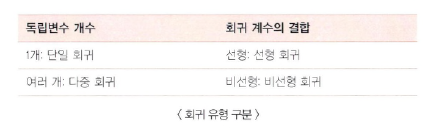

#### 지도 학습은 두 가지 유형으로 나뉘는데, 분류와 회귀다
#### 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이다.
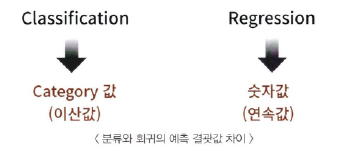

#### 회귀 중에서 선형 회귀가 가장 많이 사용된다
#### 선형 회귀란 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식
#### 또, 같은 선형 회귀라도 규제 방식에 따라 별도의 유형으로 나뉜다.
#### 규제란 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것
#### 대표적인 선형 회귀 모델은 아래와 같다.
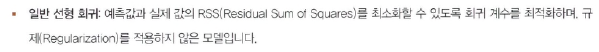
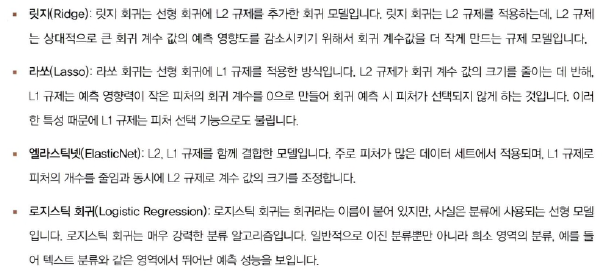

# 2. 단순 선형 회귀를 통한 회귀 이해
#### 단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다.

#### 주택 가격이 주택의 크기로만 결정된다고 했을 때, 일반적으로 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 선형의 관계로 표현할 수 있다.
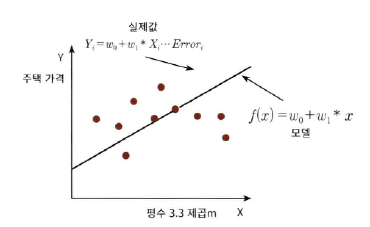

#### 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부릅니다. 
#### 최적의 회귀 모델을 만든다는 것은 전체 데이터의 잔차 합이 최소가 되는 모델을 만드는 것이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.
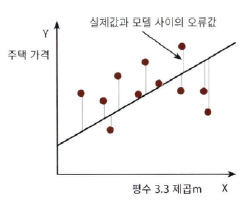

#### 오류 값은 +나 -가 될 수 있으므로, 보통 오류 합을 계산할 때는 절대값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취합니다.
#### 일반적으로 미분 등의 계산을 편리하기 위해서 RSS 방식으로 오류 합을 구합니다. Error^2 = RSS
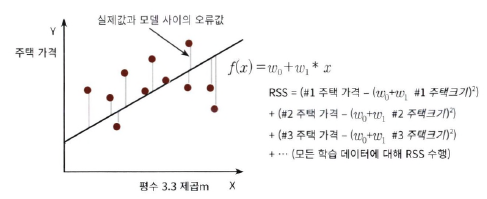

#### RSS는 변수가 W0, W1인 식으로 표현할 수 있으면, 두 변수를 최소로 하는 즉, 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다.
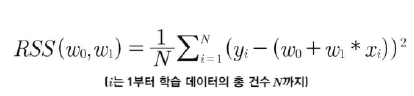
#### 회귀에서 이 RSS는 비용이며 w 변수로 구성되는 RSS를 비용 함수라고 한다.
#### 머신 러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환 되는 값(오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다.
#### 비용 함수를 손실 함수(loss function)이라고 한다.

# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent)
#### '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다.
#### 아래와 같이 포물선 형태의 2차 함수의 최저점은 2차 함수의 미분 값인 1차 함수의 기울기가 가장 최소 일 때이다.
#### 최초 w에서부터 미분을 적용한 뒤 미분 값을 계속 감소하는 방향으로 순차적으로 w를 업데이트 하고, 기울기가 최소인 점이 비용 함수가 최소의 지점으로 간주하고 w를 반환한다.
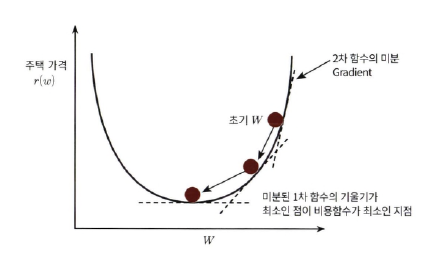

#### 경사 하강법의 일반적인 프로세스는 다음과 같다.
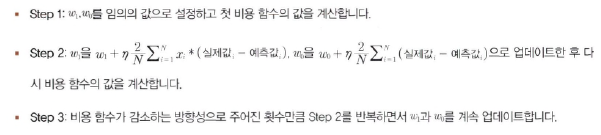

#### 경사 하강법을 파이썬 코드로 구현하자 -> 회귀 계수 w1, wo 도출

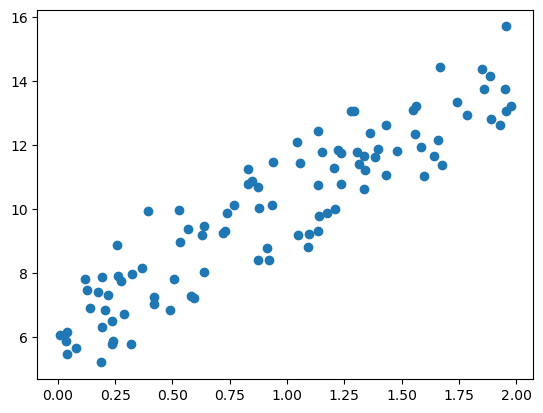

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사, 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

plt.scatter(X,y)

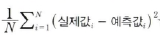
#### <계산>

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))//N
    return cost

#### gradient_descent()는 w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트 한다.
#### get_weight_update() 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0 이다.
#### 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적이다

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


#### 실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0는 6.162가 도출되었다.

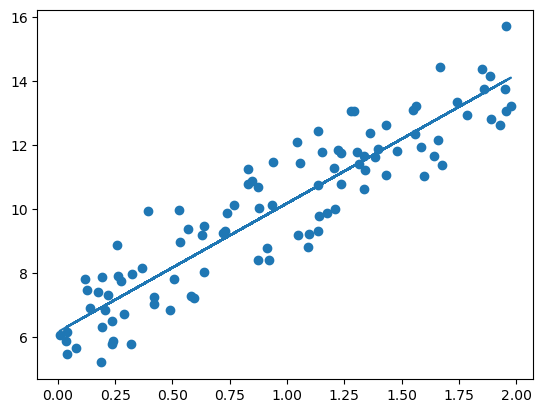

In [6]:
plt.scatter(X, y)
plt.plot(X,y_pred)

#### 일반적으로 경사 하강법은 모든 학습 데이터에 반복적으로 비용함수 최소화를 하기 때문에 시간이 오래 걸린다.
#### 그래서 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용한다.
#### 확률적 경사 하강법은 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장한다.
#### stochastic_gradient_descent_steps() 함수는 앞에 생성한 gradient_descent_steps()와 크게 다르지 않다 -> 전체 데이터가 아닌 랜덤하게 batch_size만큼 데이터를 추출한 w0, w1를 업데이트 하는 것

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


#### 경사 하강법으로 구현한 값들과 확률적 경사 하강법으로 구현한 결과가 크게 다르지 않다 -> 큰 데이터를 처리할 경우 확률적 경사 하강법을 이용하자

#### 피처가 여러 개인 경우에는 어떻게 회귀 계수를 도출할까?
#### 피처가 M개 있다면 그에 따른 회귀 계수도 M+1(1개는 w0)개로 도출된다.

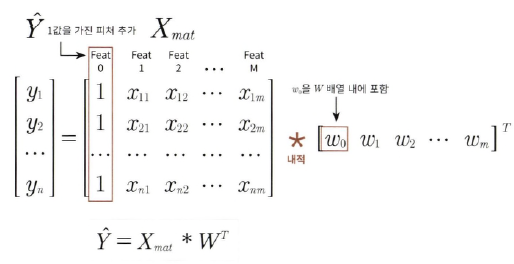

# 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## LinearRegression 클래스 - Ordinary Least Squares
#### 예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
#### fit() 메서드로 X, y 배열을 입력받으면 회귀 계수인 W를 coef_ 속성에 저장한다.

In [9]:
# class sklearn.1inear_model.LinearRegression(fit_intercept=Truez normalizedaIse, copy_X=True,
# n jobs=1)

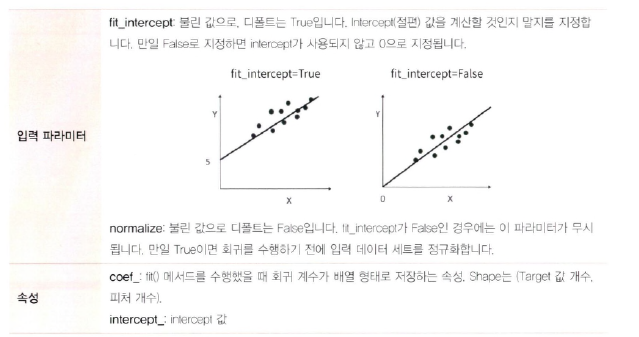

#### OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다
#### 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감 -> 다중공선성 문제
#### 상관관계가 높은 피처가 많은 경우 독립적인 중요 피처만 남기고 제거하거나 규제 적용
#### 매우 많은 피처가 다중 공선성 문제를 가진다면 PCA를 통해 차원 축소를 수행해보자

## 회귀 평가 지표
#### 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.
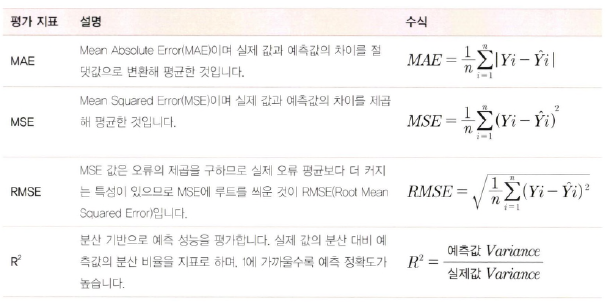

#### 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값이다.
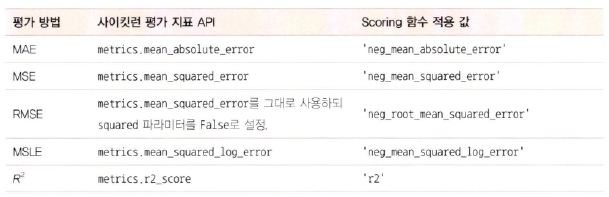

#### 주의사항으로는 scoring 파라미터에서 'neg_' 접두어는 음수를 가진다는 의미인데, MAE는 절대값을 적용하기 때문에 음수를 가질 수 없다.
#### Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics. mean_absolute_error()이니 주의가 필요하다.

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
## *공지*
#### 사이킷런의 load_boston() 함수가 삭제되었기(데이터셋의 특성 “B” 때문) 때문에, 해당 예제는 저자의 실행 결과를 대신 보여주겠습니다. 
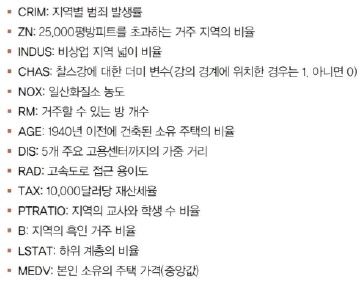

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

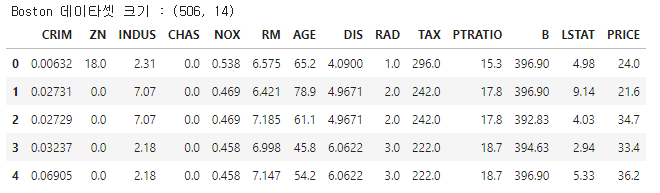
#### 데이터 세트의 NULL 값은 없으면 모두 float형이다.
#### 각 컬럼이 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다.

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

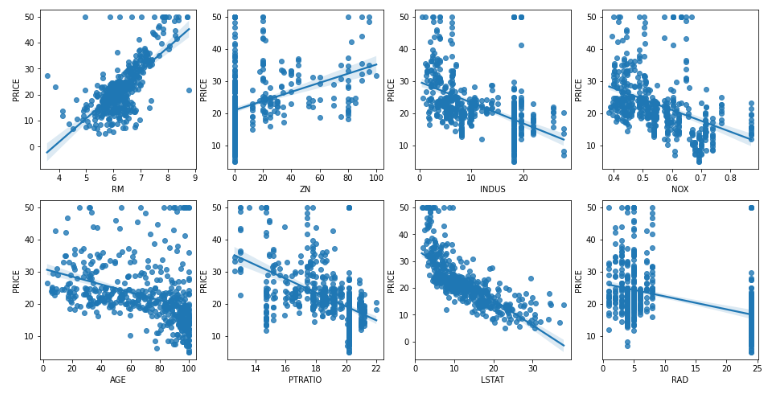
#### RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.
#### RM(방 개수)는 양 방향의 선형성, LSTAT(하위 계층의 비율)는 음 방향의 선형성이 가장 크다.
#### 이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 생성하자 -> metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score를 측정하자.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

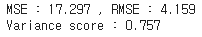

In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

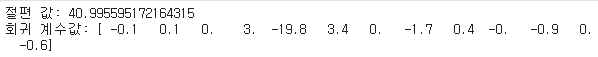

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

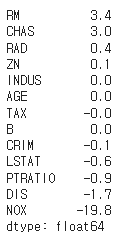

#### cross_val_score()를 이용해 교차 검증 수행(MSE, RMSE) -> scoring='neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환!

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

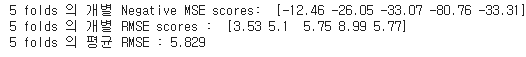

# 5. 다항 회귀와 과(대)적합/과소적합 이해
## 다항 회귀 이해

#### 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 한다.
#### y = w0 + w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2로 표현 가능
#### 다항 회귀는 비선형 회귀가 아니라 선형 회귀이다. -> 선형/비선형 나누는 기준은 회귀 계수가 선형/비선형인지를 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다
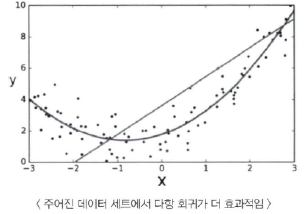

#### 사이킷런은 다항 회귀를 위한 클래스는 명시적으로 제공하지 않지만 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.
#### 사이킷런의 PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환한다
#### PolynomialFeatures는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [13]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


#### 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다.
#### PolynomialFeatures(degree=3)은 단항 계수 피처 [x1, x2]를 10개의 3차 다항 계수로 변환한다.

In [15]:
from sklearn.linear_model import LinearRegression
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 10개의 회귀 계수가 도출되었고, 원래 다항식 계수 값이랑 차이가 있지만 다항 회귀로 근사하고 있다
#### 이렇게 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것 보다는 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 좋다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해
#### 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 오히려 테스트에서는 예측 정확도가 떨어지는 과적합 문제가 발생!
#### 아래 예제를 통해서 확인해보자

#### 학습 데이터로 30개의 임의의 데이터 X, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성

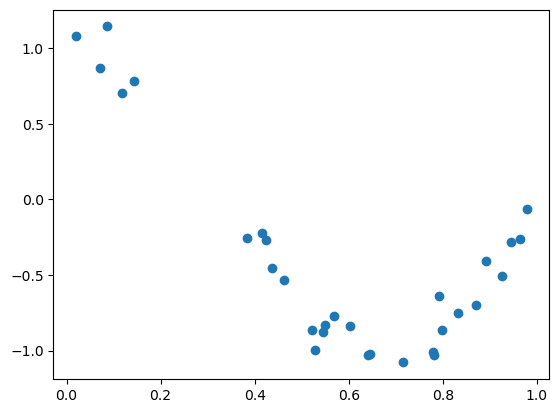

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X, y)

#### 다항식 차수를 1, 4, 15로 변경하면서 예측 결과를 비교해보자


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


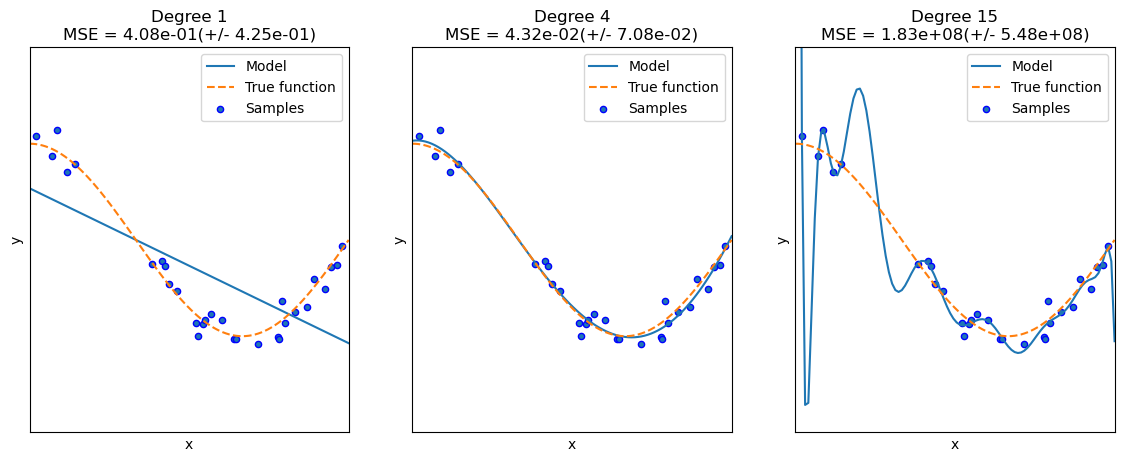

In [19]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

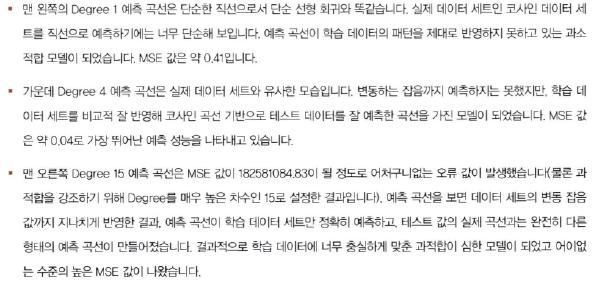

## 편향-분산 트레이드오프(Bias-Variance Trade off)
#### Degree1 : 지나치게 한 방향성으로 치우친 경향 - 고편향(High Bias)성
#### Degree15 : 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델 - 고분산(High Variance)성
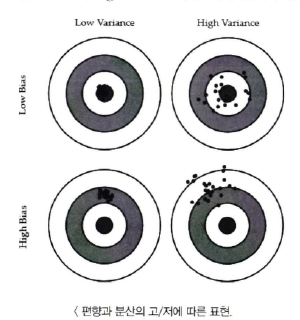

#### 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향
#### 즉, 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합)
#### 편향이 너무 높으면 전체 오류가 높고, 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다
#### 편향을 낮추다가 전체 오류가 낮아지는 '골디락스'지점을 통과하면 분산이 지속적으로 높아지면서 오류 값이 오히려 증가하고 예측 성능이 다시 저하된다.
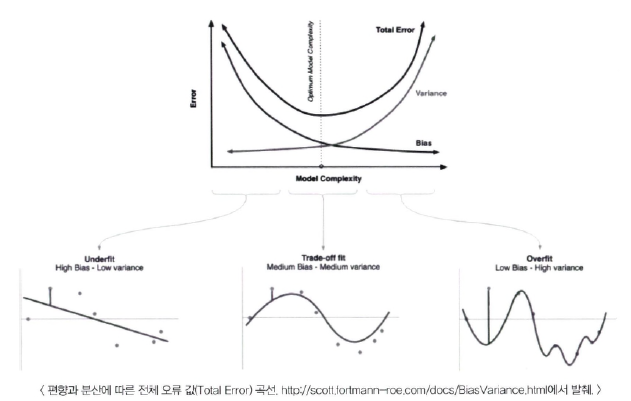

#### 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다!